<a href="https://colab.research.google.com/github/pinkdolphin11/ESAA/blob/main/session_1128_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 기본 분류 : 의류 이미지 분류

옷 이미지(운동화, 셔츠 등)를 분류하는 신경망 모델 훈련

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.9.2


## 패션 MNIST 데이터셋 import

10개의 범주(category)와 70,000개의 흑백 이미지로 구성된 [패션 MNIST](https://github.com/zalandoresearch/fashion-mnist) 데이터셋을 사용

60,000개의 이미지를 사용하여 네트워크를 훈련 10,000개의 이미지를 사용하여 네트워크에서 이미지 분류를 학습한 정도를 평가.

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## 데이터 탐색

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
len(test_labels)

10000

## 데이터 전처리

훈련 세트에 있는 첫 번째 이미지를 보면 픽셀 값의 범위가 0~255 사이이다.

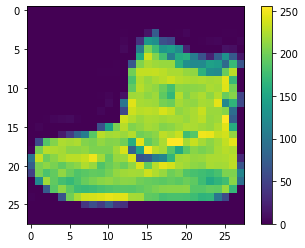

In [9]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

픽셀값의 범위를 0~1 사이로 조정

In [10]:
train_images = train_images / 255.0

test_images = test_images / 255.0

훈련 세트에서 처음 25개 이미지와 그 아래 클래스 이름을 출력

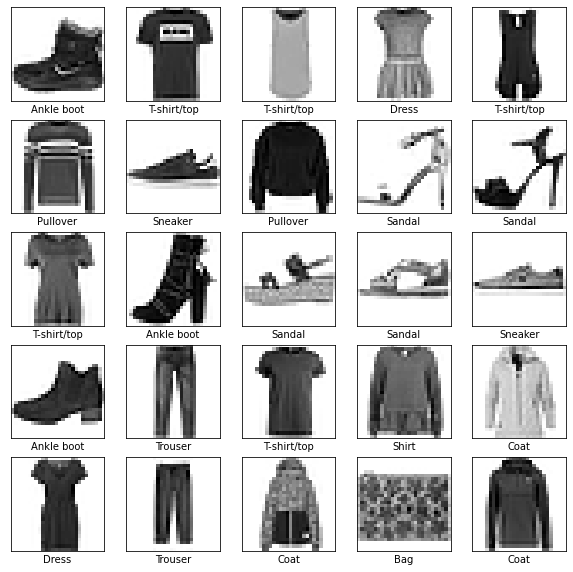

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## 모델 구성


### 층 설정

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

`tf.keras.layers.Flatten` : 2차원 배열(28 x 28 픽셀)의 이미지 포맷을 28 * 28 = 784 픽셀의 1차원 배열로 변환

`tf.keras.layers.Dense`(밀집 연결(densely-connected) 또는 완전 연결(fully-connected)층) : 첫 번째 `Dense` 층은 128개의 노드, 두 번째 층은 10개 노드의 softmax 층(10개의 확률을 반환)

### 모델 컴파일


In [13]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## 모델 훈련

단계

1. 훈련 데이터를 모델에 주입
2. 모델이 이미지와 레이블을 매핑
3. 테스트 세트에 대한 모델의 예측을 만듦
4. 예측이 `test_labels` 배열의 레이블과 일치하는지 확인

### 모델 fit

In [14]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5013 - accuracy: 0.8249
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3776 - accuracy: 0.8651
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3372 - accuracy: 0.8772
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3133 - accuracy: 0.8848
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2958 - accuracy: 0.8915
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2801 - accuracy: 0.8968
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2680 - accuracy: 0.9008
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2574 - accuracy: 0.9047
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2477 - accuracy: 0.9074
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.236

정확도 약 0.91

### 정확도 평가


In [15]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3319 - accuracy: 0.8876 - 697ms/epoch - 2ms/step

Test accuracy: 0.8876000046730042


테스트 세트의 정확도가 훈련 세트의 정확도보다 조금 낮다.

### 예측하기


In [16]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [17]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


첫 번째 예측 확인

In [18]:
predictions[0]

array([2.1134259e-07, 6.5438542e-08, 2.4363980e-10, 4.5613244e-10,
       3.6592127e-09, 1.8970619e-04, 3.9296896e-08, 1.0021002e-02,
       3.9124398e-06, 9.8978519e-01], dtype=float32)

10개의 옷 품목에 상응하는 모델의 신뢰도(confidence)를 나타낸다.

가장 높은 신뢰도를 가진 레이블:

In [19]:
np.argmax(predictions[0])

9

이 값이 맞는지 테스트 레이블을 확인:

In [20]:
test_labels[0]

9

10개 클래스에 대한 예측을 그래프로 표현

In [21]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

### 예측 확인


0번째 원소의 이미지, 예측, 신뢰도 점수 배열을 확인

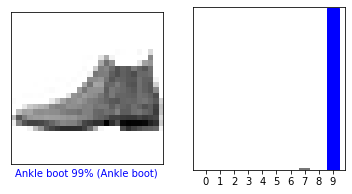

In [22]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

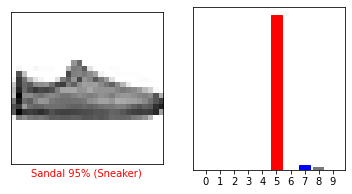

In [23]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

파란색 : 올바르게 예측된 레이블

빨간색  : 잘못 예측된 레이블은 빨강색

숫자 : 예측 레이블의 신뢰도 퍼센트(1신뢰도 점수가 높을 때도 잘못 예측할 수 있음)

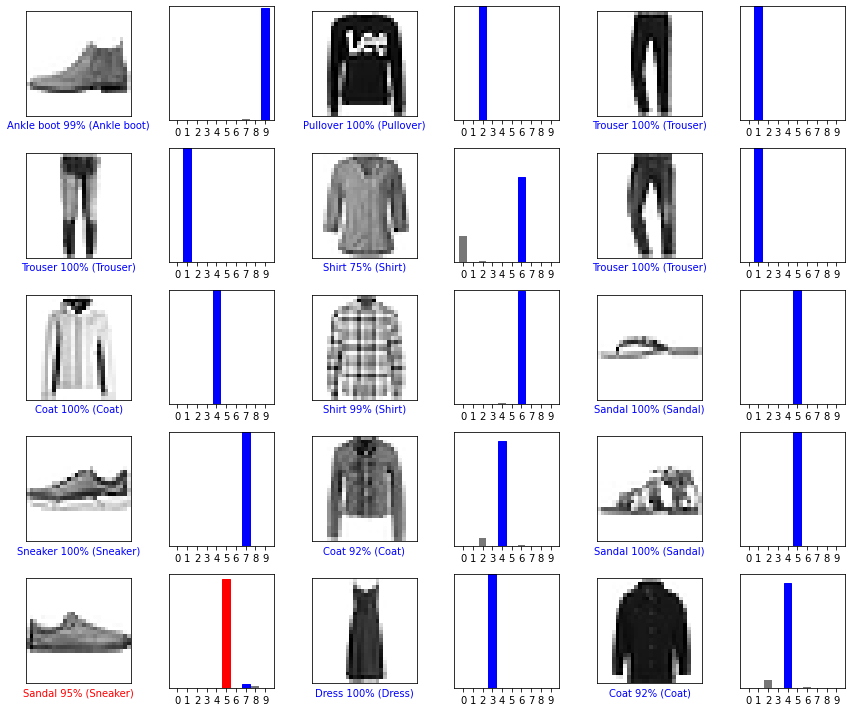

In [24]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## 훈련된 모델 사용하기


In [25]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [26]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


이미지의 예측 만들기

In [27]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 22ms/step
[[7.9919719e-06 2.8198522e-12 9.9945551e-01 1.1311225e-10 5.0861004e-04
  9.1365956e-13 2.7925360e-05 2.9531385e-13 3.0521701e-12 2.5463545e-15]]


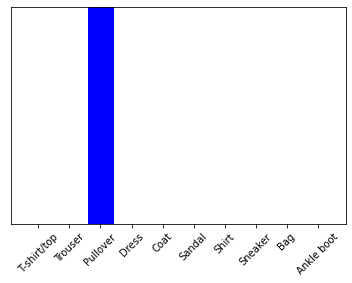

In [28]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

`tf.keras.Model.predict` : 데이터 배치의 각 이미지에 대해 하나의 목록씩 목록의 목록을 반환. 배치에서 (유일한) 이미지에 대한 예측을 가져옴.

In [29]:
np.argmax(predictions_single[0])

2